<a href="https://colab.research.google.com/github/smarvar/Machine-Learning-UNS/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/smarvar/Machine-Learnig-practice/master/Cuarteto_de_Anscombe.csv"

df = pd.read_csv(link, sep=';')
df

,x,y,x.1,y.1,x.2,y.2,x.3,y.3
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


**Verificando los parametros de los 4 Datasets**

Media


In [81]:
print('Media')
print(df.mean())

Media
x      9.000000
y      7.500909
x.1    9.000000
y.1    7.500909
x.2    9.000000
y.2    7.500000
x.3    9.000000
y.3    7.500909
dtype: float64


Varianza

In [82]:
print('Varianza')
print(df.var(ddof=1))

Varianza
x      11.000000
y       4.127269
x.1    11.000000
y.1     4.127629
x.2    11.000000
y.2     4.122620
x.3    11.000000
y.3     4.123249
dtype: float64


In [5]:
a = np.array((df['x'])).reshape(-1,1)
b = np.array((df['y']))

Linear Regresión

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(a, b) 
print('w = ' + str(lm.coef_) + ', b = ' + str(lm.intercept_))
print('R2 = ' + str(lm.score(a,b)))

w = [0.50009091], b = 3.0000909090909094
R2 = 0.6665424595087748


Datos a evaluar

In [7]:
new_data = np.array(([16, 8], [8, 6], [16,10], [16,6]))

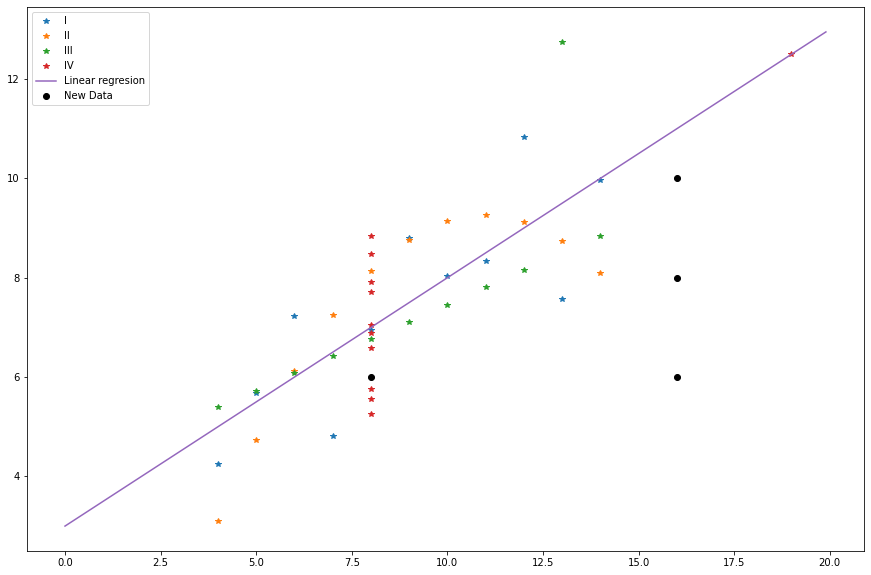

In [8]:
import matplotlib.pyplot as plt

eje_x = np.arange(0,20,0.1).reshape(-1,1)
y_pred = lm.predict(eje_x)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df.iloc[:,0], df.iloc[:,1], '*', label='I')
ax.plot(df.iloc[:,2], df.iloc[:,3], '*', label='II')
ax.plot(df.iloc[:,4], df.iloc[:,5], '*', label='III')
ax.plot(df.iloc[:,6], df.iloc[:,7], '*', label='IV')
ax.plot(eje_x, y_pred, '-', label='Linear regresion')
ax.plot(new_data[:,0], new_data[:,1], 'o', label='New Data', c='black')
ax.legend()
#ax.grid(True)
plt.show()

Al no tener un criterio estadistico de discriminación, se recurre a una asignación de los nuevos datos por inspección visual y tendencia general de los datos, con lo cual se tiene:

Teniendo los puntos:

A [16, 8] se puede ver que pertenece al Dataset I. 
B [8, 6] se puede ver que pertenece al Dataset IV.
C [16, 10] se puede ver que pertenece al Dataset III.
D [16, 6] se puede ver que pertenece al Dataset II.

Tambien se podria plantear lo siguiente: descartar aquellos puntos de los dataset que se ven como Outlayers y nuevamente plantear la regresion lineal para estos. La cual ya no sera la que se tuvo anteriormente. Esto permitiria asociar mas facilmente los Datasets I, III, y IV. Sin embango el Dataset II se observa que su tendencia es parabolica, por lo que una regresión polinomial de 2do grado seria mas conveniente para este caso.
